# Graphs: Depth First Search (DFS) and Breadth First Search (BFS)

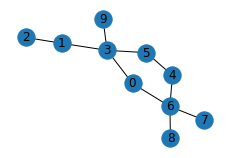

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(list(range(10)))
G.add_edges_from([(1,2),(1,3), (3,0), (3,9),(4,5),(6,7), (3,5),(4,6),(6,0), (6,8)])

fig=plt.figure(figsize=(3,2))
#fig= plt.subplots(figsize=(6,4))
nx.draw(G, with_labels=True)

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation
def animarNodos(G, listaAnimacion, seed=123):
    size = len(nx.degree(G))
    fig, ax =plt.subplots(figsize=(6,6))
    color_map=["green"]*size
    pos= nx.spring_layout(G, seed=seed) 
    eSize = len(G.edges())
    edge_color= ["black"]*eSize
    le = [(u,v) for u,v in G.edges()]
    
    def update(i):
        ax.clear()
        v= listaAnimacion[i]
        if(len(v)==1):
            color_map[v[0]]="red"
        else:
            edge_color[le.index((v[0],v[1]))]="red"

        nx.draw(G,node_color=color_map, with_labels=True, pos=pos, edge_color=edge_color)

    ani = matplotlib.animation.FuncAnimation(fig, update, frames = len(listaAnimacion), interval=1000)
    return ani

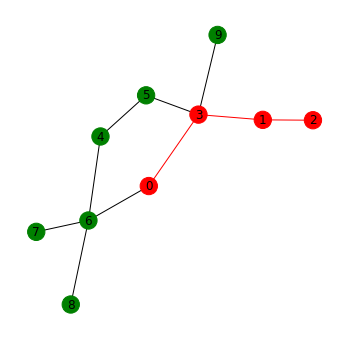

In [4]:
animN = [[1],[1,2],[2],[1,3],[3],[0,3],[0]]
ani= animarNodos(G,animN)
from IPython.display import HTML
HTML(ani.to_jshtml())

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def createRandomGraph(size, edgeProb, seed=123):
    G = nx.Graph()
    G.add_nodes_from(list(range(size)))
    random.seed(seed)
    graph = [[False]*size for _ in range(size) ]
    
    for i in range(size):
        for j in range(i,size):
            if i == j or random.randint(0, 100) > edgeProb:
                continue
        
            graph[i][j] = True
            graph[j][i] = True
            i1, i2 = [i, j ] if i < j else [j,i]
            G.add_edge(i1,i2)
    return graph, G 
            

Graph with 10 nodes and 18 edges


[[False, True, False, True, False, False, False, True, True, False],
 [True, False, False, False, False, False, True, True, True, False],
 [False, False, False, False, False, False, False, True, True, False],
 [True, False, False, False, False, True, False, False, True, True],
 [False, False, False, False, False, False, False, False, True, True],
 [False, False, False, True, False, False, True, False, True, True],
 [False, True, False, False, False, True, False, True, False, False],
 [True, True, True, False, False, False, True, False, False, False],
 [True, True, True, True, True, True, False, False, False, False],
 [False, False, False, True, True, True, False, False, False, False]]

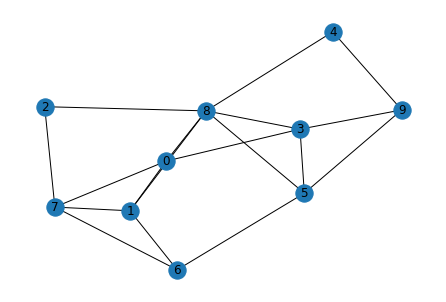

In [22]:
graph, G = createRandomGraph(10, 25)
nx.draw(G, with_labels=True)
graph

In [42]:
def DFS(graph, start, end):
    stack=[start]
    size = len(graph)
    anim=[]
    stackE = []
    path = []
    visited = [False]*size
    while stack:
        node = stack.pop()
        if node  == end:
            anim.append([node])
            path.append(node)
            return True, path, anim
        if not visited[node]:
            visited[node] = True
            anim.append([node])
            path.append(node)
            for i in range(size):
                if graph[node][i] == True  and not visited[i]:
                    stack.append(i)
                    i1, i2 = [node, i] if node < i else [i, node]
                    stackE.append([i1,i2])
        if stackE: 
            e = stackE.pop()
            anim.append(e)
        
    return False, path, anim



True [6, 7, 2, 8, 5, 9, 4]
[[6], [6, 7], [7], [2, 7], [2], [2, 8], [8], [5, 8], [5], [5, 9], [9], [4, 9], [4]]


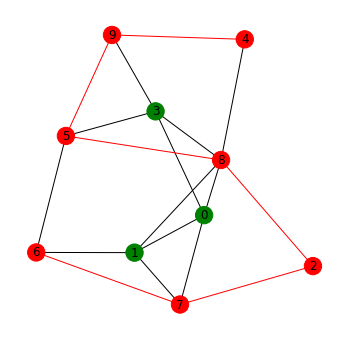

In [46]:
response, path, animN = DFS(graph, 6, 4 )
print(response, path)
print (animN)
ani= animarNodos(G,animN)
from IPython.display import HTML
HTML(ani.to_jshtml())


In [44]:
def BFS(graph, start, end):
    stack=[start]
    size = len(graph)
    anim=[]
    stackE = []
    path = []
    visited = [False]*size
    while stack:
        node = stack.pop(0)
        if node  == end:
            anim.append([node])
            path.append(node)
            return True, path, anim
        if not visited[node]:
            visited[node] = True
            anim.append([node])
            path.append(node)
            for i in range(size):
                if graph[node][i] == True  and not visited[i]:
                    stack.append(i)
                    i1, i2 = [node, i] if node < i else [i, node]
                    stackE.append([i1,i2])
        if stackE: 
            e = stackE.pop(0)
            anim.append(e)
        
    return False, path, anim

True [6, 1, 5, 7, 0, 8, 3, 9, 2, 4]


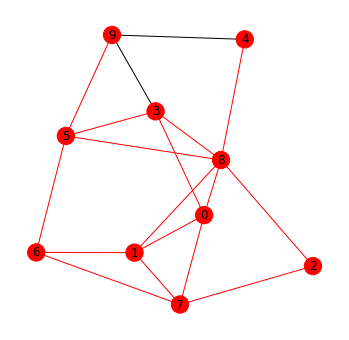

In [45]:
response, path, animN = BFS(graph, 6, 4 )
print(response, path)
ani= animarNodos(G,animN)
from IPython.display import HTML
HTML(ani.to_jshtml())